#**Bike_Sharing_Demand_Prediction-Regression Analysis**

#**Problem statement**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

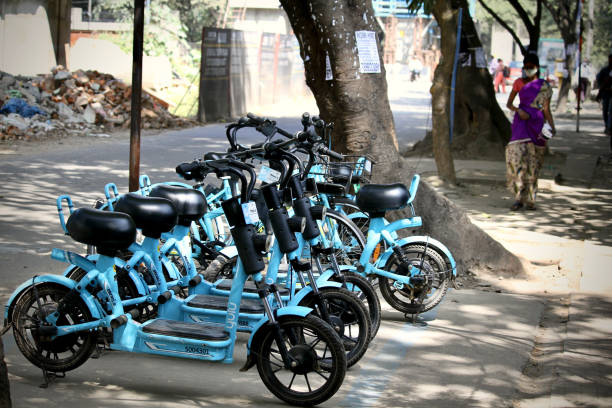

##**Project Summary**
In this project I have done analysis on data set available from bikes. I have started by importing important libraries and thren mounting drive followed by loading the data set. I have used various graphical and non graphical ways to do analysis.

As a data analyst one spends 60%-70% of time cleaning data, this steps is most cruical. We shall make relevant changes to dataset in this step. I have drawn all conclusions with help of different types of charts like scatter plot,bar charts , pie charts. In Categorical Variable and Univariate analysis indiviual column/variable has been picked up and analysis has been made using graphical and non graphical method,followed by Bivariate Analysis.I had taken each column and analyzerd the demand of bike according to it, for eg: the demand of bike according to hour , month, rainfall,snowfall ,visibility and other factors listed in the coulmns.

Further the data types have bben converted into relevant data tupes for better analysis,had checked for presence of null values,duplicate values. Outliers have been handled too and null values created due to dropping of outliers have been further treated by imputing them wit median value of respective column.
The skewness of our dependent variab;e is treated by using square root method.
The resultant graph is less skewed and free from outliers.


Featuring of the variables have been done as itv is pre - requisite to do and also the relation of numerical variables with the dependent variable has been done graphically to analyse their relation.

Once done we shall start splitting the dataset into two parts : dependent variables(X) and independent variable(Y).Then furher split your dataset into training and testing dataset.I shall be using various metrics to compare the output and find the best values that satisfy or for which cost function is lowest.I shall use GridSearchCV to choose our alpha values.
We shall then implement regression model and then once done I would use LASSO AND RIDGE regrsssion to futher better the outputs.

At the end some conclusion have been drawn to gain insights and also important factor influencing the demand has been listed.

#**GitHub**


https://github.com/Bike_Rental/Bike_rental_regression



In [ ]:
# importing all important libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew


In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# loading the dataset
path = '/content/drive/MyDrive/SeoulBikeData.csv'

df= pd.read_csv(path,encoding="ISO-8859-1")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Let us find what our variables are :

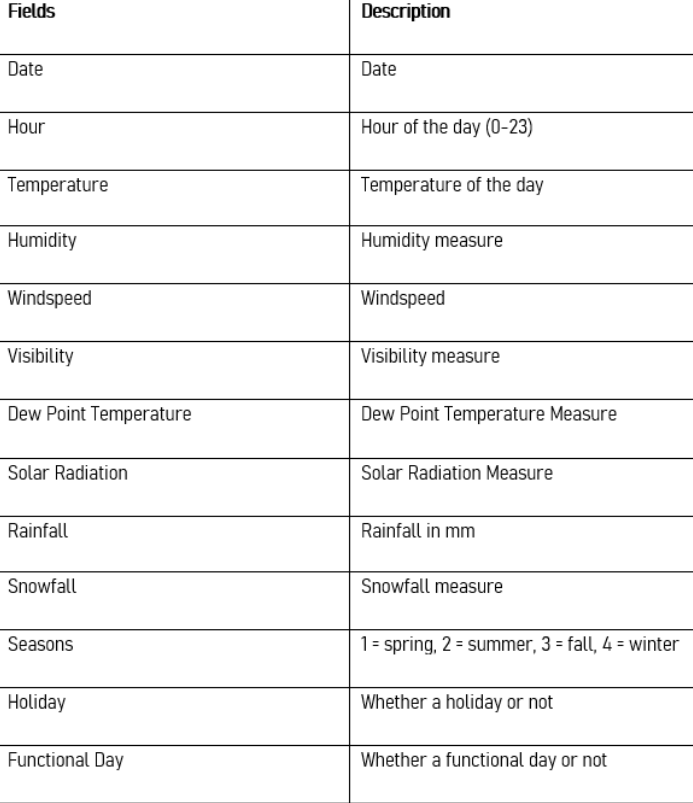

In [ ]:
#creating the copy of our dataset
df_bike = df.copy()

###**We shall now explore our data set**

In [ ]:
# finding the shape of our dataset
df_bike.shape

(8760, 14)

We have 8760 rows and 14 columns

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

It is evident from here we have zero null value in our dataset

The dataset has total number of 8760 values with 14 different features.
There are 10 numerical [ 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed', 'Visibility ', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall' ]

 4 non numerical  feature ('Date', 'Seasons', 'Holiday', 'Functioning_Day').

However, date has data type of object which should be further treated to have correct data type and as per data description hour represents timestamp.

We shall now explore these columns


<Axes: >

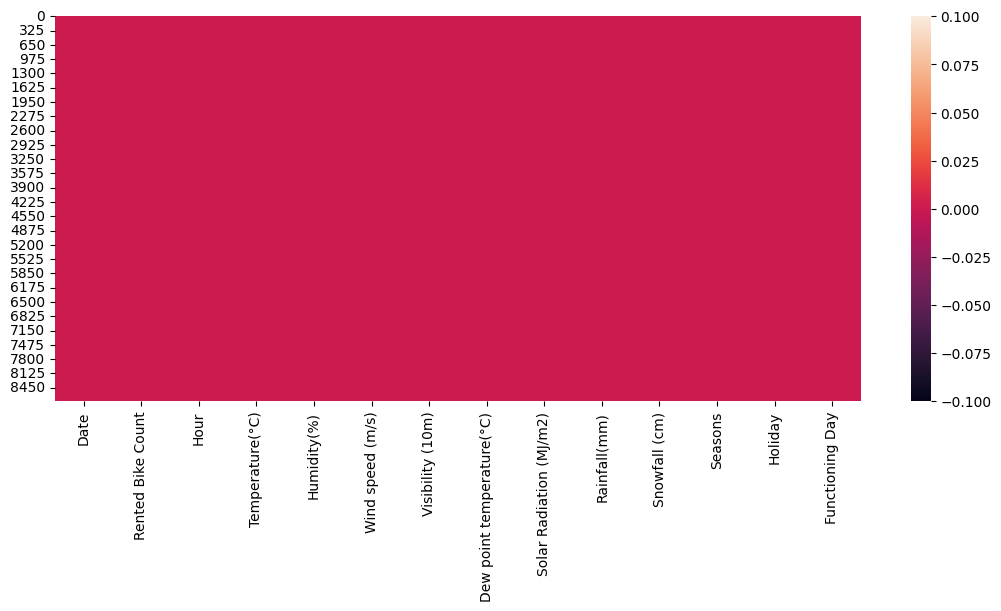

In [ ]:
# Lets visulaize if there is any null value
# Visulaizing the null values.
plt.figure(figsize=(13,5))
sns.heatmap(df_bike.isnull())

There are zero null values in this dataset

In [ ]:
# let's see if there is any duplicate
no_of_duplicate_records = len(df_bike[df_bike.duplicated()])
print(no_of_duplicate_records )
# we have zero duplicate records

0


In [ ]:
df_bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


We may not need to perform extensive data cleansing because the ranges of values in the numerical columns appear fair as well. However,columns like Wind speed , Dew_point_temperature, Solar Radiation, Rainfall and Snowfall appears to be skewed as their median (50 percentile) is much lower than the highest value.

In [ ]:
# we shall now find unique values of columns to have better understanding of our data set
df_bike.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [ ]:
def groupby_count(col):
  return df_bike.groupby(col)['Rented Bike Count'].sum().reset_index()

In [ ]:
holiday_count = (groupby_count('Holiday')).T
holiday_count

,0,1
Holiday,Holiday,No Holiday
Rented Bike Count,215895,5956419


In [ ]:
seasons_count =  (groupby_count('Seasons')).T
seasons_count

,0,1,2,3
Seasons,Autumn,Spring,Summer,Winter
Rented Bike Count,1790002,1611909,2283234,487169


In [ ]:
function_count = (groupby_count('Functioning Day')).T
function_count

,0,1
Functioning Day,No,Yes
Rented Bike Count,0,6172314


In [ ]:
df_bike['Date']=df_bike['Date'].astype('datetime64[ns]')
df_bike['month'] = df_bike['Date'].apply(lambda x : x.month)

#Extract day of the week from 'Date' column and store it in a new column 'day_of_week'
df_bike['day_of_week'] = df_bike['Date'].dt.day_name()

#Create a new column 'weekdays_weekend' which stores 0 for weekdays and 1 for weekends
df_bike['weekdays_weekend']=df_bike['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )



<ipython-input-276-6b8d28f16ccf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_bike['Date']=df_bike['Date'].astype('datetime64[ns]')


In [ ]:
#Drop the 'Date' and 'day_of_week' columns from the dataframe
df_bike=df_bike.drop(columns=['Date','day_of_week'],axis=1)

#we need only month of the year and the weekday_weekend column for analysis hence droppinf date and day_of_week

In [ ]:
df_bike.shape

(8760, 15)

In [ ]:
df_bike.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
df_bike['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
#since weekdays_weekend,month,hour column are int type we shall convert them in category column
cols = ['Hour','weekdays_weekend','month']
for col in cols:
  df_bike[col]=df_bike[col].astype('category')

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

We have handeled our numeric data type ,categorical data type and date data type variables, now we shall start our ananlysis

#**HERE BEGINS EDA OF ML**

In [ ]:
#Our dependent variable is 'Rented Bike count' and other being our independent variable
# let us explore and find nature of our dependent variable

<ipython-input-284-99165a4601fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_bike['Rented Bike Count'],color='green',ax=axes[0])


<Axes: xlabel='Rented Bike Count'>

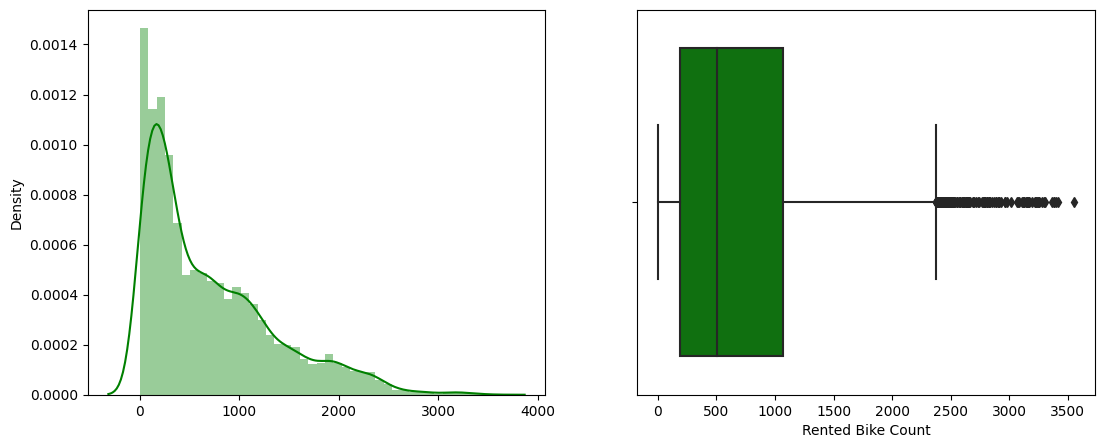

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.distplot(x=df_bike['Rented Bike Count'],color='green',ax=axes[0])
sns.boxplot(x=df_bike['Rented Bike Count'],color='green',ax=axes[1])

*The distribution of the "Rented Bike Count" appears to be skewed to the right, indicating that the majority of the bike rental counts are lower.

*There is a long-tailed distribution, which suggests the presence of outliers.

*The distribution is not symmetrical, indicating that the mean and median might be different.



**By Using Squre Root Method we Normalize our target variable**

<ipython-input-285-422e3ca74ff2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=np.sqrt(df_bike['Rented Bike Count']),color='green',ax=axes[0])


<Axes: xlabel='Rented Bike Count'>

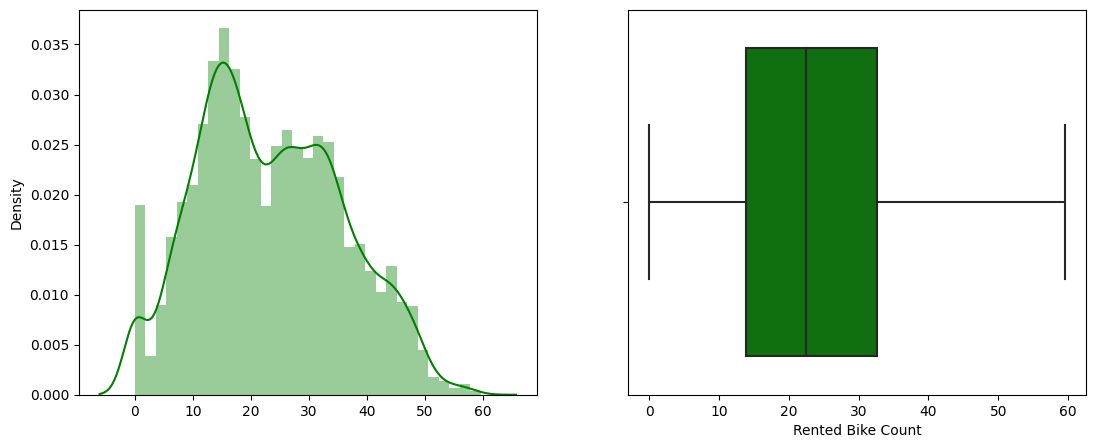

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.distplot(x=np.sqrt(df_bike['Rented Bike Count']),color='green',ax=axes[0])
sns.boxplot(x=np.sqrt(df_bike['Rented Bike Count']),color='green',ax=axes[1])

##**EDA  using categorical values**

**Demand according to Holiday variable**

In [ ]:
holiday_count = groupby_count('Holiday')
holiday_count
#m 0 means holiday and 1 means it is not holiday

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


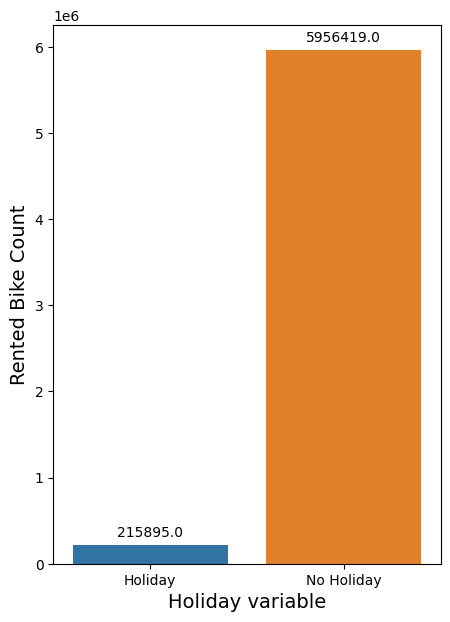

In [ ]:
#Creating a visualisation for the holidays dataframe
plt.figure(figsize=(5,7))
splot = sns.barplot(data=holiday_count,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

**It is very evident the demand of bikes is more on working day rather than holiday**

**Demand according to season variable**

In [ ]:
seasons_count =  groupby_count('Seasons')
seasons_count

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


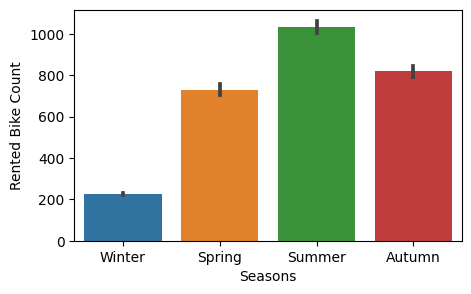

In [ ]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(5,3))
splot = sns.barplot(data=df_bike,x='Seasons',y='Rented Bike Count')

**Summer season has the highest demand**

**Let us find out how our bike demand varies with month**


[Text(0.5, 1.0, 'Rented bikes Count By Month')]

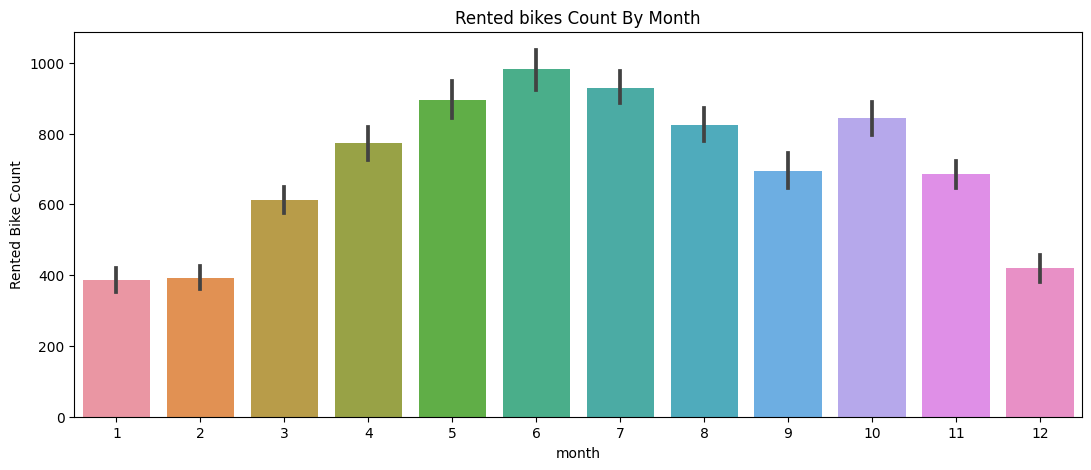

In [ ]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=df_bike,x='month',y='Rented Bike Count')
ax.set(title='Rented bikes Count By Month')

Highest demand of bikes have been in **JUNE** followed by JULY , MAY

**Demand according to Functioning_Day variable**

In [ ]:
function_count = groupby_count('Functioning Day')
function_count

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


[Text(0.5, 1.0, 'Rented bikes Count according to Functionig Day')]

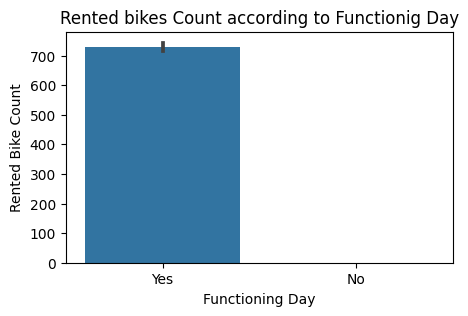

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))
sns.barplot(data=df_bike,x='Functioning Day',y='Rented Bike Count')
ax.set(title='Rented bikes Count according to Functionig Day')

**On a functioning day only we have demand of bike **

In [ ]:
Hour_count = groupby_count('Hour')
Hour_count

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


[Text(0.5, 1.0, 'Rented bikes Count acording to Hour')]

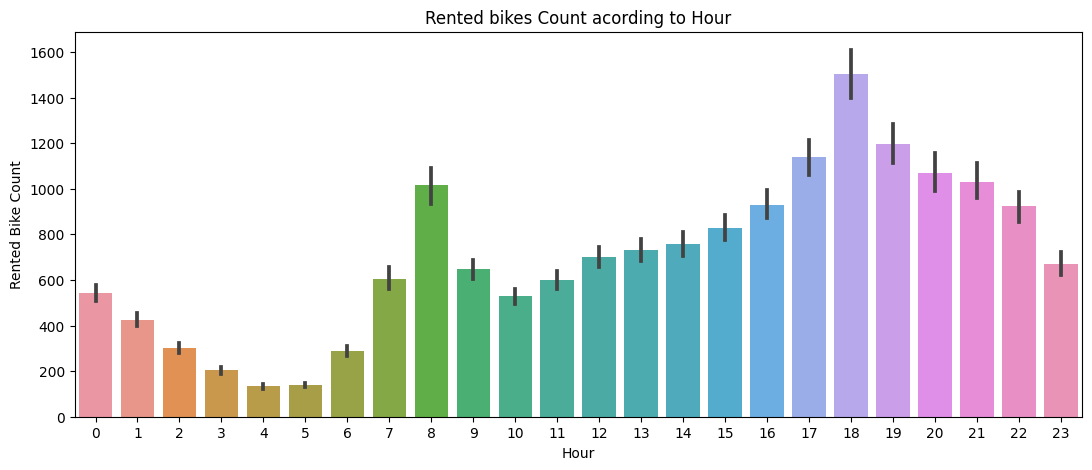

In [ ]:
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(data=df_bike,x='Hour',y='Rented Bike Count')
ax.set(title='Rented bikes Count acording to Hour')

**Highest demand is around 0800 hrs and 1800 hrs,which are mainly office starting and ending hours,indicating the demand rises in morning and evening.**

In [ ]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_count = groupby_count('Temperature(°C)')
temp_count

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


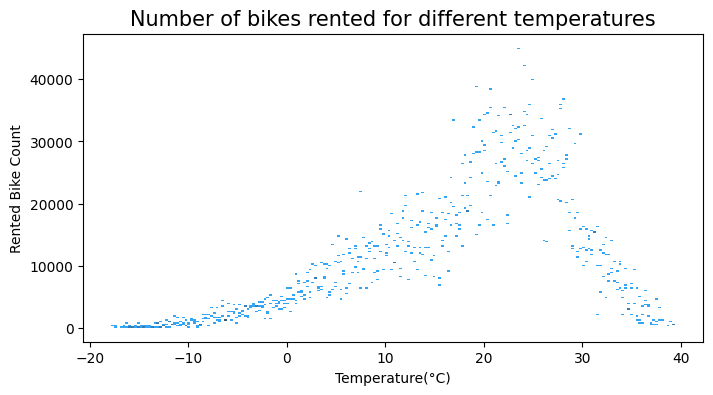

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=temp_count,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

**The demand for the bikes start rising from 15 degree celsius**

In [ ]:
humidity_count = groupby_count('Humidity(%)')
humidity_count

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


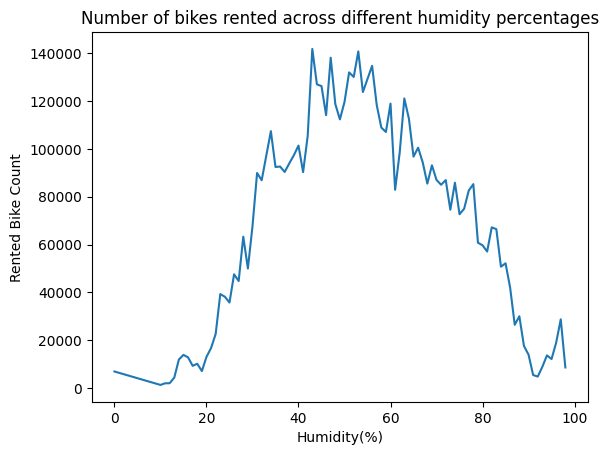

In [ ]:
plt.plot(humidity_count['Humidity(%)'],humidity_count['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()


**As we can see that the majority of the bikes are rented for a humidity percentage range of 30 to 70.**

In [ ]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of snowfall
snowfall_count= groupby_count('Snowfall (cm)')
snowfall_count

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981
5,0.5,4716
6,0.6,2775
7,0.7,5108
8,0.8,5632
9,0.9,4854


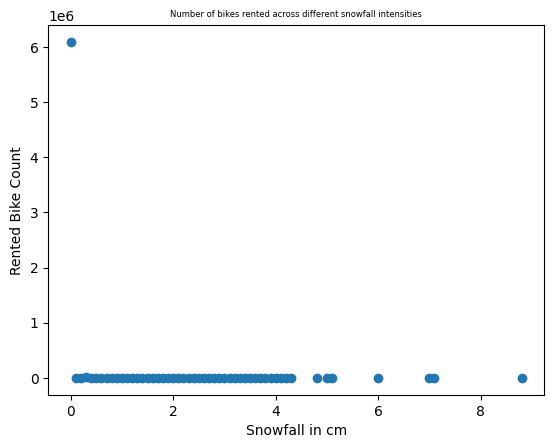

In [ ]:
plt.scatter(data=snowfall_count,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities',size=6)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

**The demand for the bikes rises when there is no snowfall**

In [ ]:
# Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_count = groupby_count('Rainfall(mm)')
rainfall_count

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147
...,...,...
56,21.0,19
57,21.5,596
58,24.0,61
59,29.5,122


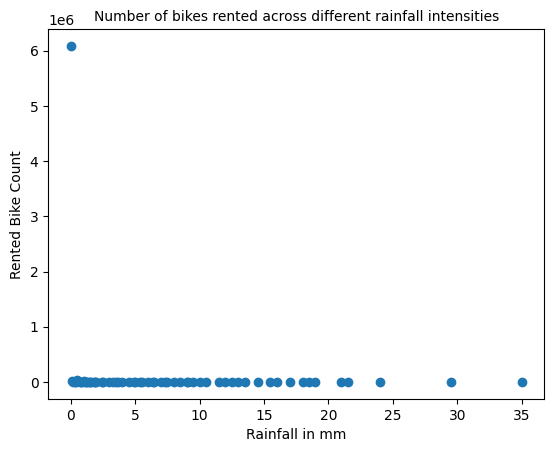

In [ ]:
plt.scatter(data=rainfall_count,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

**There is high demand of bikres when there is no rain**

In [ ]:
visibility_count = groupby_count('Visibility (10m)')
visibility_count

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


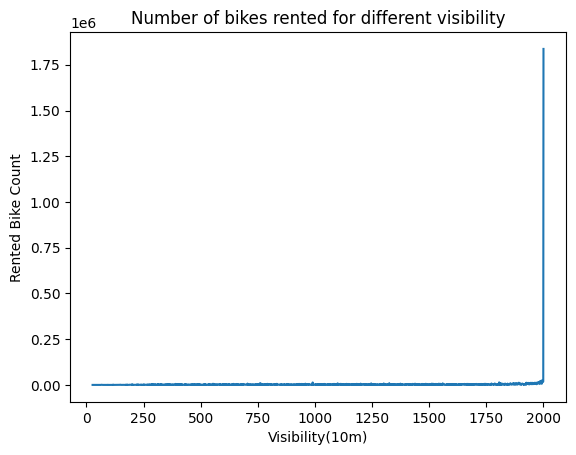

In [ ]:
#Creating a visualisation for number of bikes rented in different visibility ranges
plt.plot(visibility_count['Visibility (10m)'],visibility_count['Rented Bike Count'])
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented for different visibility')
plt.show()

**As the visibility increases the demand for the bike increases**

While we did this analysis we did realise our variables like ranfall,snowfall have outliers. Let us do box plot analysis to find outliers better and do relevant procedure to treat it in case any.


In [ ]:
# Box plot analysis is only for numerical column
outlier_columns = list(set(df_bike.describe().columns)-{'Rented Bike Count' ,'Hour','Summer','Winter','Spring','Autumn','Hoilday','month','weekdays_weekend'})
outlier_columns

['Visibility (10m)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Humidity(%)',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)']

<Figure size 1000x700 with 0 Axes>

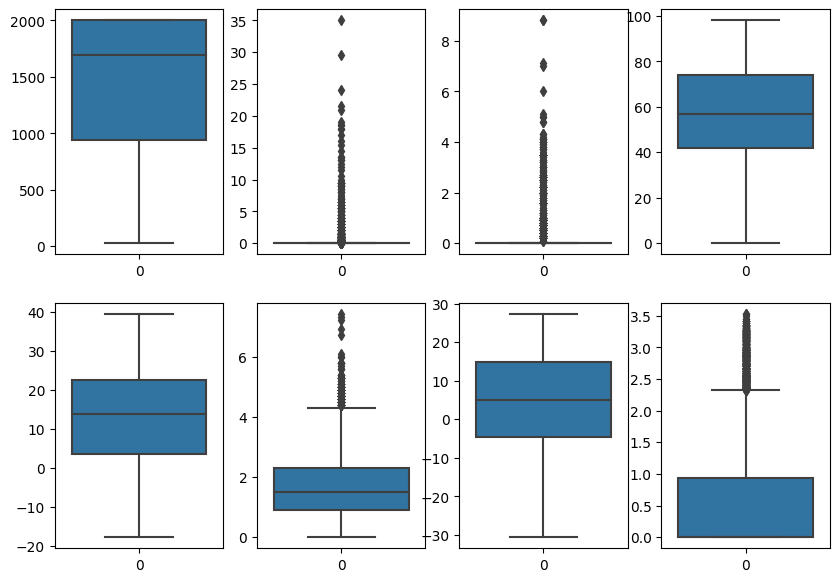

In [ ]:
plt.figure(figsize=(10,7))
# for index,item in enumerate(outlier_columns):
  # plt.subplot(2,4,index+1)
  # sns.boxplot(df_bike[item])
  #Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(outlier_columns):
  plt.subplot(2,4,index+1)
  sns.boxplot(df_bike[item])

**As it is evident box plot 1,2,4,7 which corresponds to variable
 'Snowfall (cm)',
'Solar Radiation (MJ/m2)',  
'Wind speed (m/s)',
'Rainfall(mm)'
have outliers.Let us now handle them.**




In [ ]:
outlier_list = ['Snowfall (cm)','Solar Radiation (MJ/m2)','Wind speed (m/s)','Rainfall(mm)']

In [ ]:
#Finding the inter-quartile range for the columns with outliers
Q1 = df_bike[outlier_list].quantile(0.25)
Q3 = df_bike[outlier_list].quantile(0.75)
IQR = Q3-Q1
IQR

Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
Wind speed (m/s)           1.40
Rainfall(mm)               0.00
dtype: float64

In [ ]:
#Calculating the upper and lower limit for outlier removal
u_limit = Q3 + (1.5*IQR)
l_limit = Q1 - (1.5*IQR)

In [ ]:
df_bike[outlier_list] = df_bike[outlier_list][~((df_bike[outlier_list] < l_limit) |(df_bike[outlier_list] > u_limit))]
# we hve som e null values post deleting outliers
df_bike[outlier_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Snowfall (cm)            8317 non-null   float64
 1   Solar Radiation (MJ/m2)  8119 non-null   float64
 2   Wind speed (m/s)         8599 non-null   float64
 3   Rainfall(mm)             8232 non-null   float64
dtypes: float64(4)
memory usage: 273.9 KB


**Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaningful values. In this case I will be imputing them with the median value of each column.**

In [ ]:
def manage_null(outlier_list):
  for i in outlier_list:
    df_bike[i].fillna(df_bike[i].median(),inplace=True)

In [ ]:
manage_null(outlier_list)

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

**Since there are zero null values,we have been able to handle outliers**

##**Bivariate Analysis**

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour For Holiday / No Holiday')

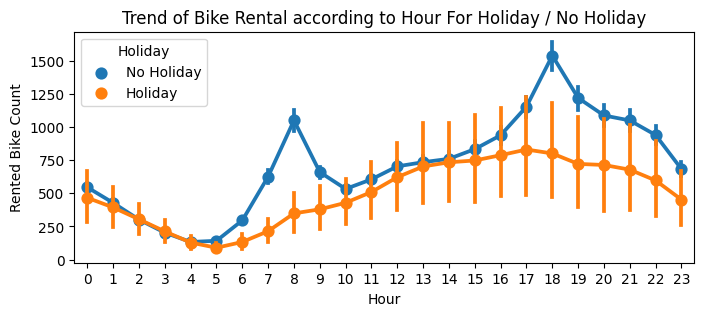

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
sns.pointplot(data=df_bike, x='Hour',y='Rented Bike Count',hue = 'Holiday')
plt.title("Trend of Bike Rental according to Hour For Holiday / No Holiday")

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour on Functioning day')

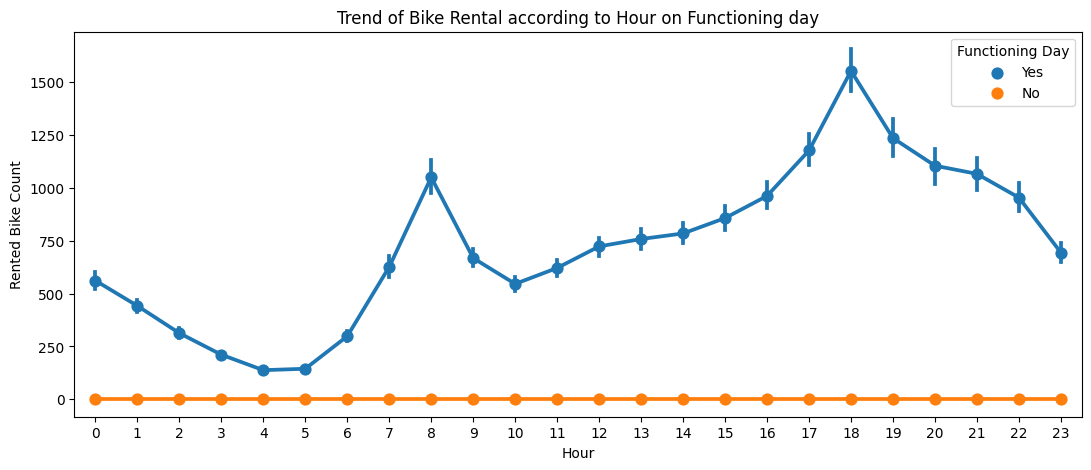

In [ ]:
plt.figure(figsize=(13,5))
sns.pointplot(data=df_bike, x='Hour',y='Rented Bike Count',hue='Functioning Day')
plt.title("Trend of Bike Rental according to Hour on Functioning day")

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

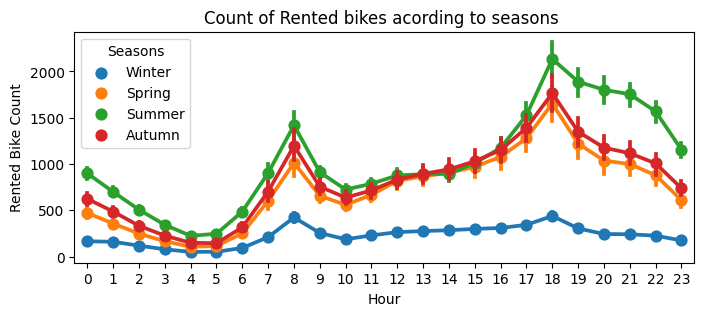

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
sns.pointplot(data=df_bike,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

Text(0.5, 1.0, 'Trend of Bike Rental according to Hour in different months')

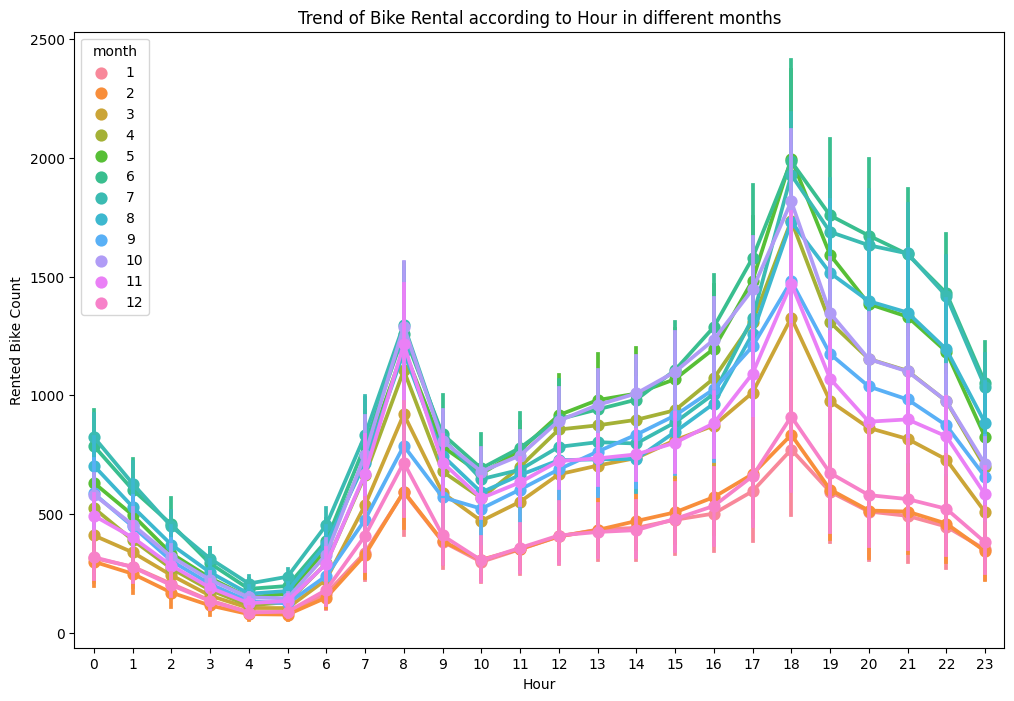

In [ ]:
plt.figure(figsize=(12,8))
sns.pointplot(data=df_bike, x='Hour',y='Rented Bike Count',hue='month')
plt.title("Trend of Bike Rental according to Hour in different months")


Text(0.5, 1.0, 'Trend of Bike Rental according to Hour in Weekday or weekend.')

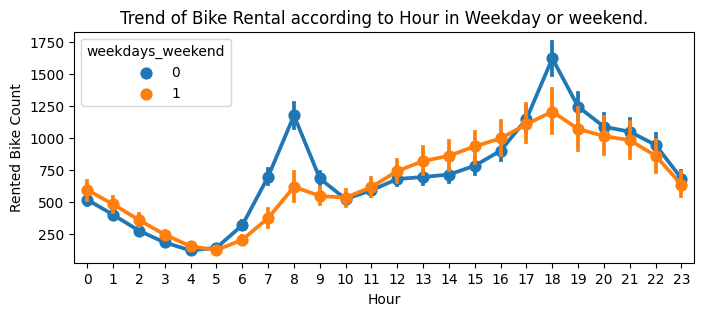

In [ ]:
plt.figure(figsize=(8,3))
sns.pointplot(data=df_bike, x='Hour',y='Rented Bike Count',hue='weekdays_weekend')
plt.title("Trend of Bike Rental according to Hour in Weekday or weekend.")

##**FEATURE ENCODING**


Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as Feature Encoding

Here we have three columns that require encoding and they are Seasons, Holiday and Functioning Day.

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [ ]:
#Encoding for Seasons column
df_bike['Winter'] = np.where(df_bike['Seasons']=='Winter', 1, 0)
df_bike['Spring'] = np.where(df_bike['Seasons']=='Spring', 1, 0)
df_bike['Summer'] = np.where(df_bike['Seasons']=='Summer', 1, 0)
df_bike['Autumn'] = np.where(df_bike['Seasons']=='Autumn', 1, 0)



In [ ]:
#Removing seasons column since we dont require it now.
df_bike.drop(columns = ['Seasons'],axis =1,inplace = True)

In [ ]:
#Encoding for Holiday column
df_bike['Holiday'] = np.where(df_bike['Holiday']=='Holiday',1,0)

In [ ]:
#Encoding for Functioning day
df_bike['Functioning Day'] = np.where(df_bike['Functioning Day']=='Yes',1,0)

In [ ]:
df_bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'month', 'weekdays_weekend', 'Winter', 'Spring',
       'Summer', 'Autumn'],
      dtype='object')

In [ ]:
df_bike.shape

(8760, 18)

CHECKING CORRELATION

<ipython-input-325-eadfb39717f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_bike.corr()
<ipython-input-325-eadfb39717f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()),annot=True,cmap='YlGnBu')


<Axes: >

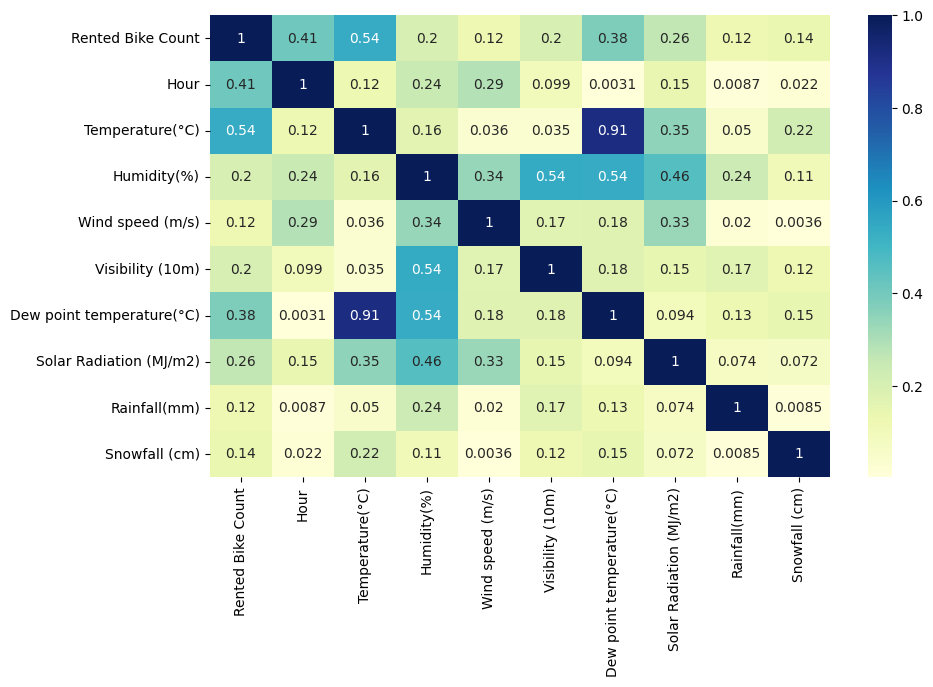

In [ ]:
plt.figure(figsize=(10,6))
corr=df_bike.corr()
sns.heatmap(abs(df.corr()),annot=True,cmap='YlGnBu')

It is clearly visibible Dew point temperature and Temperature are highly correlated,so we shall remove dew point temperaature

In [ ]:
#Dropping unnecessary columns
df_bike.drop(columns={'Dew point temperature(°C)'},axis=1,inplace = True)

Removing Multicollinearity:
Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

Note: I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.


Anytime an independent variable (feature) has a strong correlation with another independent variable, that situation is referred to as multicollinearity. Although it may not initially appear to be a problem,but as the basic objective of regression analysis is to find correlations between the independent variable and the target variable these features with high correlation can undoubtedly introduce some errors into our results.

In [ ]:
df_bikes = df_bike.copy()

In [ ]:
#Creating a list of independent columns
independent_variable = list(set(df_bikes.columns)-{'Rented Bike Count','Date'})
independent_variable

['Hour',
 'Snowfall (cm)',
 'Summer',
 'Holiday',
 'Spring',
 'Autumn',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Functioning Day',
 'Rainfall(mm)',
 'weekdays_weekend',
 'Humidity(%)',
 'Temperature(°C)',
 'month',
 'Winter']

In [ ]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
#Calculating the VIF for independent columns
calc_vif(df_bikes[independent_variable])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Columns,VIF
0,Hour,1.182936
1,Snowfall (cm),NaN
2,Summer,33.266949
3,Holiday,1.022356
4,Spring,24.396214
5,Autumn,25.928039
6,Wind speed (m/s),1.236681
7,Solar Radiation (MJ/m2),1.271214
8,Visibility (10m),1.629738
9,Functioning Day,1.080621


In [ ]:
#since rainfall and snowfall are null we are dropping them
#also our seasons namely spring,autumn,summer,winter have VIF >10 we shall drop one of them
#I choose winters because demand of bikes is least in winters as we have seen above in chart

In [ ]:
df_bikes.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)
#Creating a list of remaining independent columns

In [ ]:
calc_vif(df_bikes[[i for i in df_bikes.columns if i not in \
             ['Rented Bike Count']]])


,Columns,VIF
0,Hour,4.255708
1,Temperature(°C),9.804973
2,Humidity(%),10.743992
3,Wind speed (m/s),4.835035
4,Visibility (10m),7.513850
5,Solar Radiation (MJ/m2),1.657797
6,Holiday,1.071580
7,Functioning Day,19.414852
8,month,5.421793
9,weekdays_weekend,1.400200


In [ ]:
#Dropping the Unnecessary columns
df_bikes.drop(columns={'Functioning Day'},axis =1,inplace = True)

In [ ]:
independent_variable = list(set(df_bikes.columns)-{'Rented Bike Count','month'})
independent_variabless = independent_variable

In [ ]:
calc_vif(df_bikes[[i for i in df_bikes.describe().columns if i not in \
             ['Rented Bike Count']]])

,Columns,VIF
0,Temperature(°C),9.160493
1,Humidity(%),5.196632
2,Wind speed (m/s),4.185766
3,Visibility (10m),4.876430
4,Solar Radiation (MJ/m2),1.594292
5,Holiday,1.070793
6,Spring,3.904720
7,Summer,8.999665
8,Autumn,4.408826


In [ ]:
#list of numerical columns
independent_variabless =list(set(independent_variabless)-{"Hour","month","weekdays_weekend"})

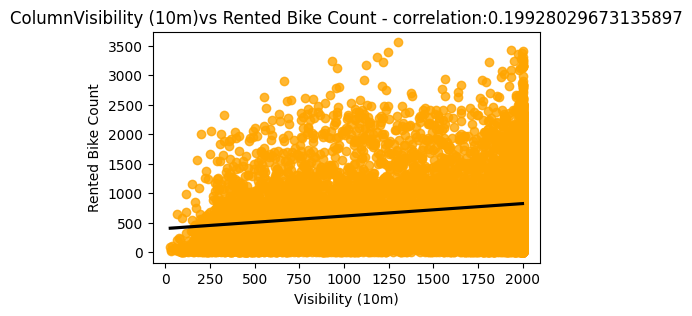

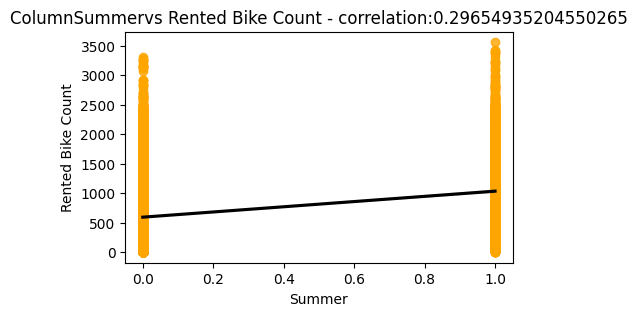

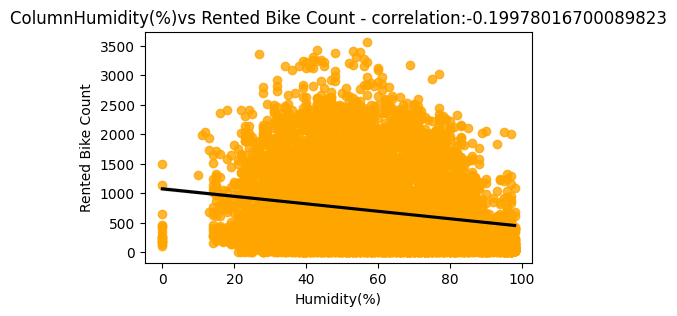

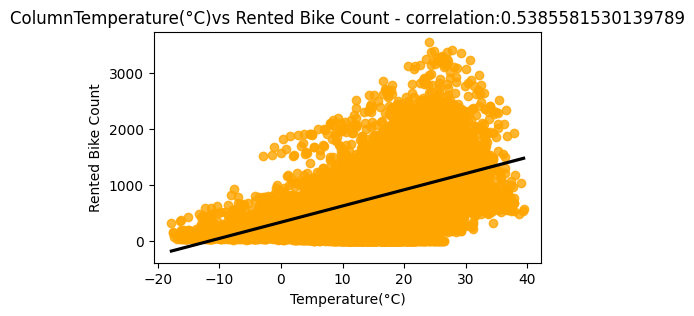

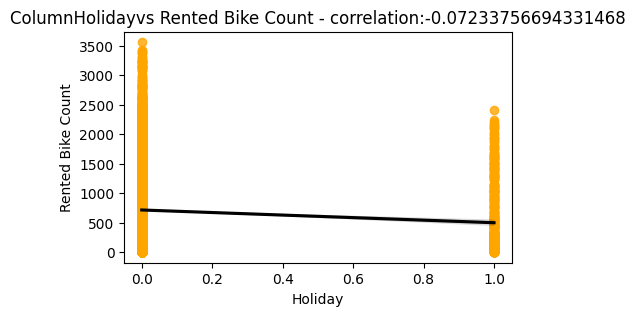

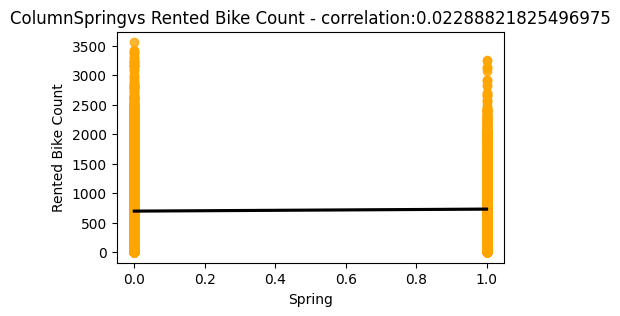

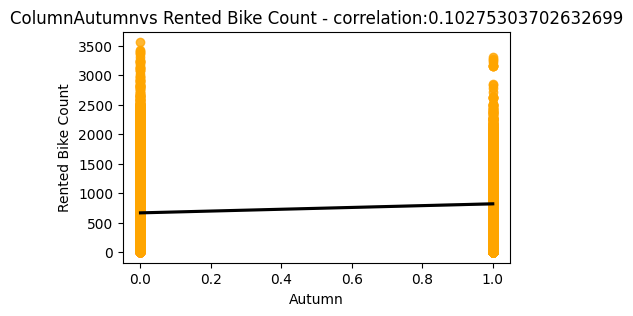

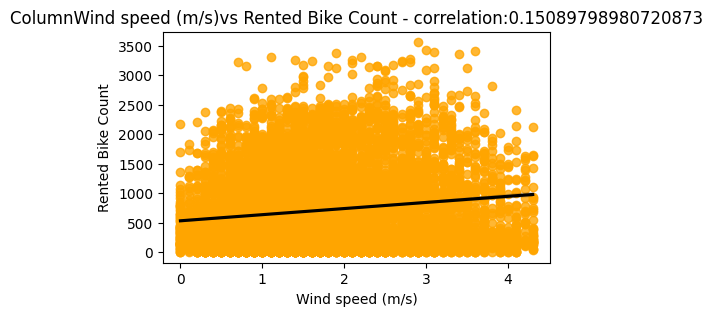

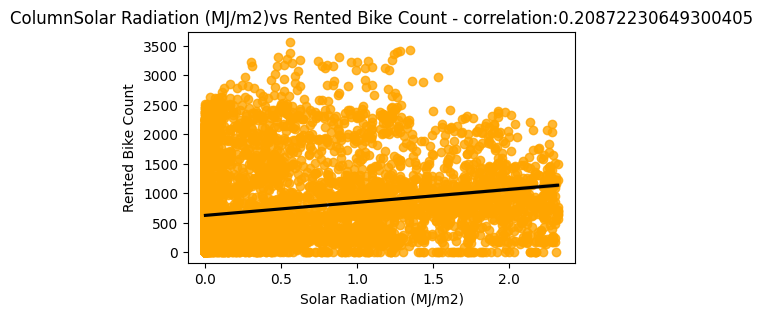

In [ ]:
#printing the regression plot for all the numerical features
for col in independent_variabless:
  fig,ax=plt.subplots(figsize=(5,3))
  sns.regplot(x=df_bikes[col],y=df_bikes['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
  corr=df_bikes[col].corr(df_bikes['Rented Bike Count'])
  ax.set_title('Column'+ col+'vs Rented Bike Count - correlation:'+str(corr))

##**1st Hypothesis**

Null Hypothesis (H0): There is no relationship between the Temprature and Rented Bike Count variables.

Alternative Hypothesis (Ha): There is a relationship between the temp and demand variables.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
# fit the model
model = sm.OLS(df["Rented Bike Count"], df[["Temperature(°C)",
                                            "Humidity(%)"]]).fit()
# obtain p-value
p_value = model.pvalues["Temperature(°C)"]

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is a relationship between Temperature(°C) and Rented Bike Count.")
else:
    print("Fail to reject the null hypothesis: \
    There is no relationship between Temperature(°C) and Rented Bike Count.")

Reject the null hypothesis
There is a relationship between Temperature(°C) and Rented Bike Count.


##**2nd Hypothesis**


Null Hypothesis (H0): There is no relationship between the windspeed and Rented Bike count variables.

Alternative Hypothesis (Ha): There is a relationship between the windspeed and Rented Bike count variables.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Fit the linear regression model
model = sm.OLS(df['Rented Bike Count'],df['Wind speed (m/s)']).fit()

# Calculate the p-value for the windspeed variable
p_value = model.pvalues['Wind speed (m/s)']

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is a relationship between windspeed and Rented Bike Count.")
else:
    print("Fail to reject the null hypothesis: \
    There is no relationship between windspeed and Rented Bike Count.")


Reject the null hypothesis
There is a relationship between windspeed and Rented Bike Count.


##**3rd  Hypothesis**
Null Hypothesis (H0): There is no relationship between the Hour variable and Rented Bike Count variable.

Alternative Hypothesis (Ha): There is a relationship between the Hour variable and Rented Bike Count variable.

In [ ]:

# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(df['Rented Bike Count'], df['Hour']).fit()

# Calculate the p-value for the holiday variable
p_value = model.pvalues['Hour']

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is a relationship between holiday and demand.")
else:
    print("Fail to reject the null hypothesis: There is no \
    relationship between holiday and demand.")

Reject the null hypothesis
There is a relationship between holiday and demand.



###**Pre processing of the data:**

In [ ]:
df_bikes.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Holiday', 'month', 'weekdays_weekend', 'Spring', 'Summer', 'Autumn'],
      dtype='object')

In [ ]:
#Creating the dataset for independent and dependent variables
X = df_bikes.drop(columns={'Rented Bike Count'},axis=1)
Y = df_bikes['Rented Bike Count']

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,month,weekdays_weekend,Spring,Summer,Autumn
0,0,-5.2,37,2.2,2000,0.0,0,1,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0,1,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0,1,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0,1,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0,1,0,0,0,0


In [ ]:
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

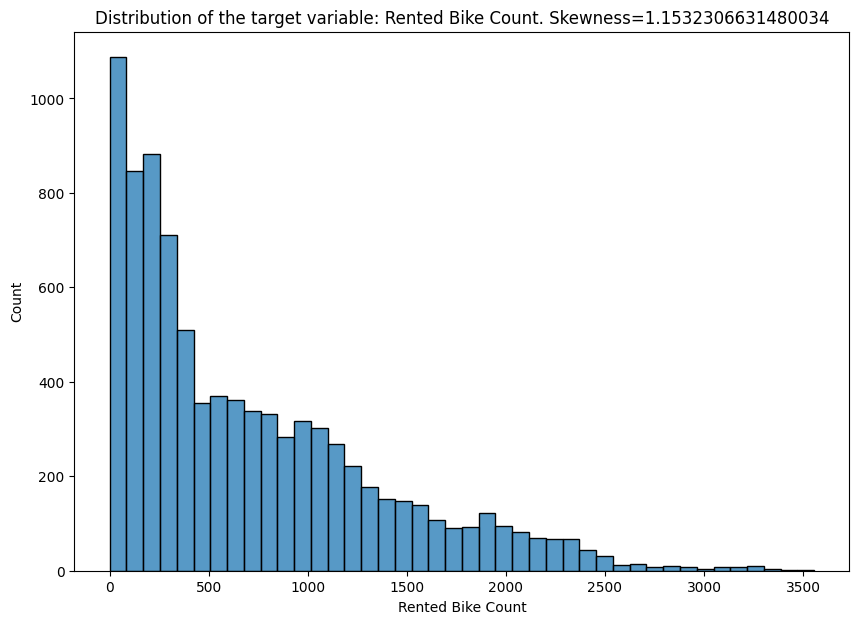

In [ ]:
#Checking for the distribution of the Target variable
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(df_bikes['Rented Bike Count'])))
sns.histplot(data=df_bikes,x='Rented Bike Count')
plt.show()

In [ ]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [ ]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

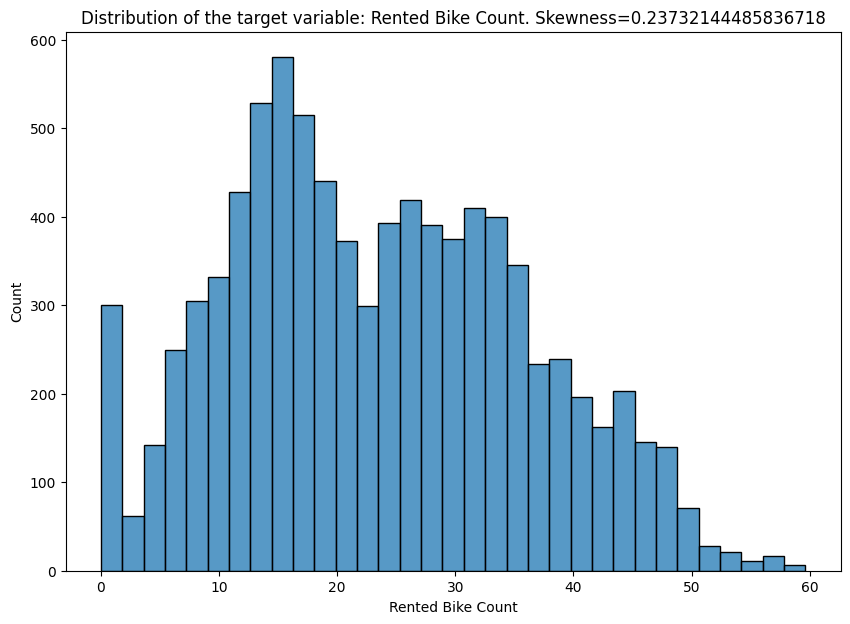

In [ ]:
#Checking how well the square root transformation has worked
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(vis_Y['Rented Bike Count'])))
sns.histplot(data=vis_Y,x='Rented Bike Count')
plt.show()

Creating the test and train dataset:

In [ ]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
#Shape of the train set of the independent values
X_train.shape

(6570, 12)

In [ ]:
X_test.shape

(2190, 12)

##**Feature Scaling**

Feature scaling is the process of transforming the features in a dataset so that their values share a similar scale.

In [ ]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [ ]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

 Model Implementation:

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and Polynominal Regression

In this project we will be include the following models:

Linear regression.
Ridge regression (Linear regression with L2 regularization).
Lasso regression (Linear regression with L1 regularization).


**Linear regression:**
As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [ ]:
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,Y_train)


In [ ]:
#Checking the score of the linear regression model
lr_model.score(X_train,Y_train)

0.48537928083509796

In [ ]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 3.46888046e+00,  4.57167234e+00, -3.27057901e+00,  1.04450902e-03,
        2.11548957e-01,  1.49920411e-01, -7.96468559e-01,  5.05711671e-01,
       -4.40090410e-01,  2.41300259e+00,  2.93747844e+00,  2.45463673e+00])

In [ ]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='green')
   plt.legend(["Actual","Predicted"])
   plt.show()

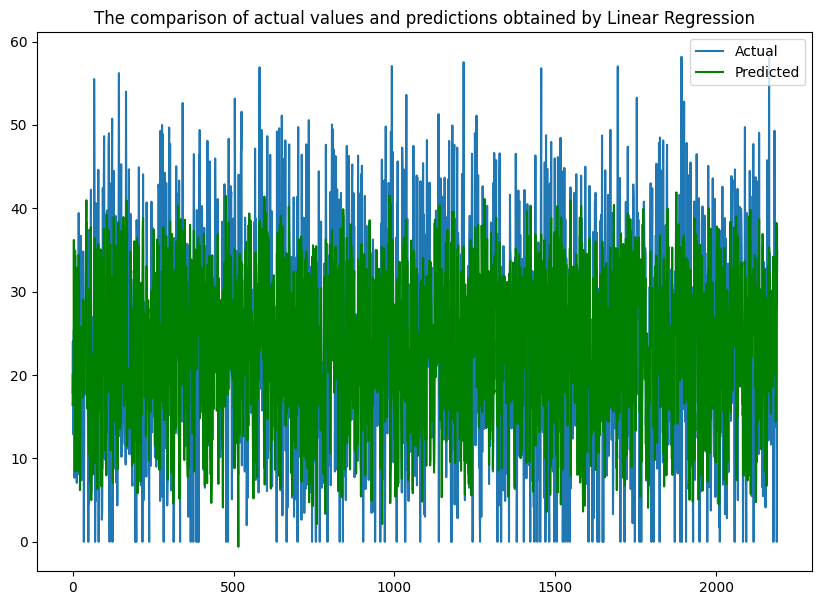

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [ ]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [ ]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 86.15940323070512
RMSE : 9.282208962887289
R2 : 0.4545713429803844
Adjusted R2 : 0.4515648460193208


Ridge Regression:

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')



The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 20}

Using {'alpha': 20} as the value for aplha gives us a negative mean squared error of: -79.66650403138944


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=20).fit(X_train,Y_train)


In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

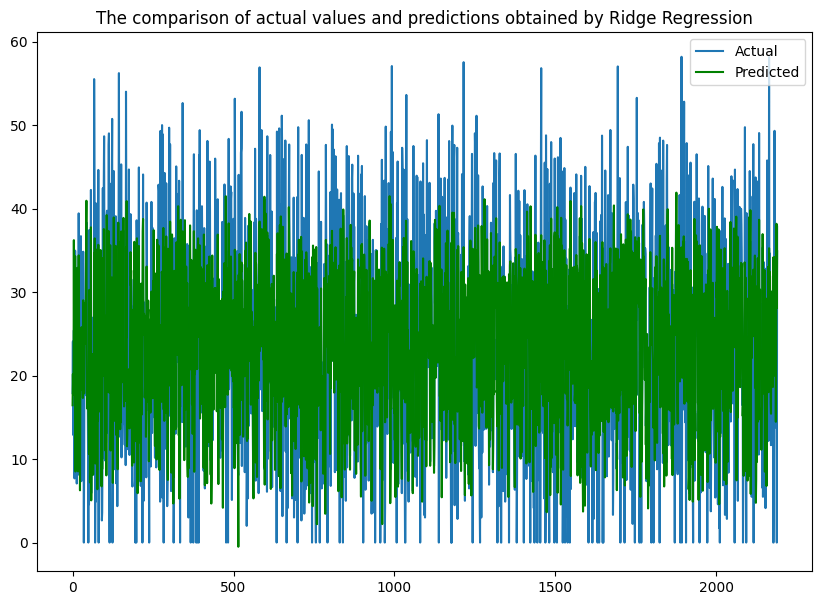

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regressio
eval_metrics(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 86.1586290429923
RMSE : 9.282167260020275
R2 : 0.45457624394474405
Adjusted R2 : 0.4515697739986425


Lasso Regression:
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [ ]:
#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {lasso_model_grid}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 0.8}

Using {'alpha': 0.8} as the value for aplha gives us a negative mean squared error of: GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

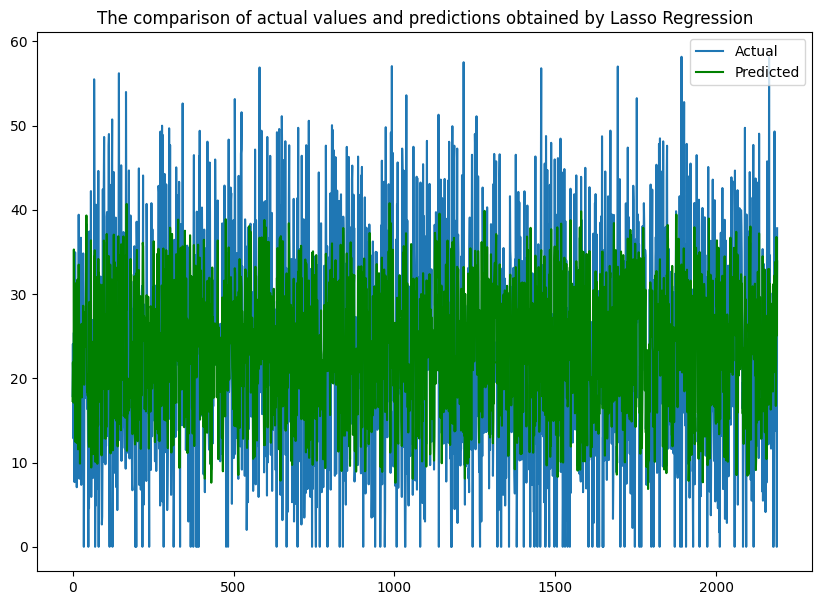

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

In [ ]:
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 90.60520391122219
RMSE : 9.518676584022707
R2 : 0.42642737954022036
Adjusted R2 : 0.4232657481917971


In [ ]:
# The model quality has depreciated by using the lasso regression method.

**Conclusion**

* Most number of bikes are rented in the Summer season and the lowest in the winter season.
* Over 96% of the bikes are rented on days that are considered as No Holiday.
* Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.
* Most number of bikes are rented when there is no snowfall or rainfall.

* Majority of the bikes are rented for a humidity percentage range of 30 to 70.
The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and morning 8am

* Most of the bike rentals have been made when there is high visibility.


Results from ML models:

Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4264.

**Temperature** and **Hour** are the two most important factors according to all the models.

